In [25]:
from __future__ import print_function
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from math import sqrt
import sklearn
from sklearn.linear_model import LogisticRegression
import pickle
import time
import torch

from utils import test_accuracy, projection, veccos, binary_search_cx, \
                  find_exp_score, find_slab_score, project_l2_centroid, \
                  project_l2_centroid_straight, project_slab, project_slab_straight,\
                  contaminate_dataset

from attackers import StraightAttack, SemiOnlineAttack, ConcentratedAttack, GreedyAttack

In [26]:
plt.rcParams['xtick.labelsize']=24
plt.rcParams['ytick.labelsize']=24

In [27]:
def plotting_by_defense(datasets, defense_methods, defense_range, attacks, n_contam_level=0, yrange=[0,1]):

    fig, ax = plt.subplots(nrows=len(defense_methods), ncols=len(datasets), 
                           sharex=False, sharey=True, figsize=(20,9))
    plt.ylim(yrange)
    plt.subplots_adjust(wspace=2)
    colors = []
    offline_res = {"IMDB":0.89, "MNIST":0.992, "fashionMNIST":0.99}
    offline_res = {"IMDB":0.89, "MNIST":0.992, "fashionMNIST":0.99, "BreastCancer":0.99}
    defense_labels = {"norm": "L2-norm", "L2":"L2-centroid", "slab":"Slab"}
    n_exp = {"IMDB":1, "MNIST":1, "fashionMNIST":1, "BreastCancer":5}
    colors = {"simplistic": "b", "greedy": "g", "semi-online": "r"}
    defense_txt = {"slab":r"Slab", 
           "norm":r"$L_2$-norm", 
           "L2":r"$L_2$ distance"+ "\n to centroid"}    
    data_txt = {"MNIST":"MNIST", 
           "fashionMNIST":r"FashionMNIST", 
           "BreastCancer":r"BreastCancer",
                  "IMDB":"IMDB"}
    for defense_idx, defense_method in enumerate(defense_methods):
        
        for k,dataset in enumerate(datasets):
            for attack_method in attacks:
                filepath = "_".join(["./results/fully", dataset, attack_method, 
                                     defense_method, defense_range, str(0)])
                #print (filepath)    
                with open(filepath, "rb") as f:
                    results = pickle.load(f)
                res, online_res, accs, w_list, taus, loc = results
                online_agg = [1-sum(item)/(len(item)-sum(loc)) for item in online_res]
                ax[defense_idx][k].plot(taus, online_agg, marker="s", color=colors[attack_method], 
                               label='{}'.format(attack_method), linewidth=2, markersize=8)
                ax[defense_idx][k].hlines(1-offline_res[dataset], 
                                          0.95*taus[0], 1.05*taus[-1], linestyles="dashdot")
            if defense_idx==0:
                ax[defense_idx][k].xaxis.set_label_position('top') 
                ax[defense_idx][k].set_xlabel(data_txt[dataset], fontsize=24)
            if k==0:
                ax[defense_idx][k].yaxis.set_label_position('left') 
                ax[defense_idx][k].set_ylabel(defense_txt[defense_method], fontsize=24) 
    txt = {"concentrated":"Concentrated", 
           "greedy":"Greedy", 
           "straight":"Simplistic", 
           "semi-online":"Semi-Online-WK"}   
    
    fig.text(0.5, -0.02, r'Defense Parameter $\tau$', ha='center', va='center', fontsize=28)
    fig.text(-0.02, 0.5, 'Online Error Rate on Clean Examples', ha='center', va='center', rotation='vertical', fontsize=26)
    
    plt.tight_layout()
    plt.show()

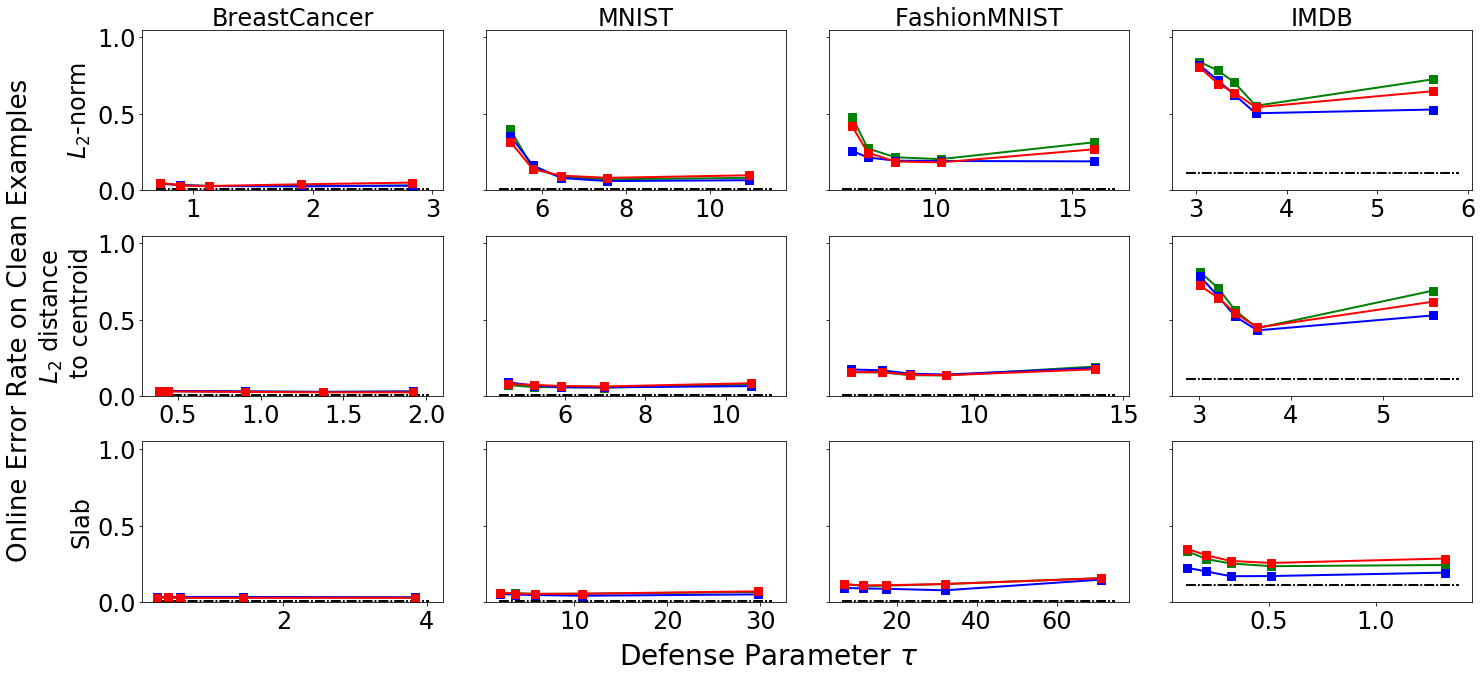

In [28]:
datasets = ["BreastCancer", "MNIST", "fashionMNIST", "IMDB"]
defense_method = "norm"
defense_methods = ["norm", "L2", "slab"]
attacks = ["greedy", "simplistic", "semi-online"]

defense_range = "all-pts"
plotting_by_defense(datasets, defense_methods, defense_range, attacks, yrange=[0,1.05])